In [2]:
pip install extra-keras-datasets


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


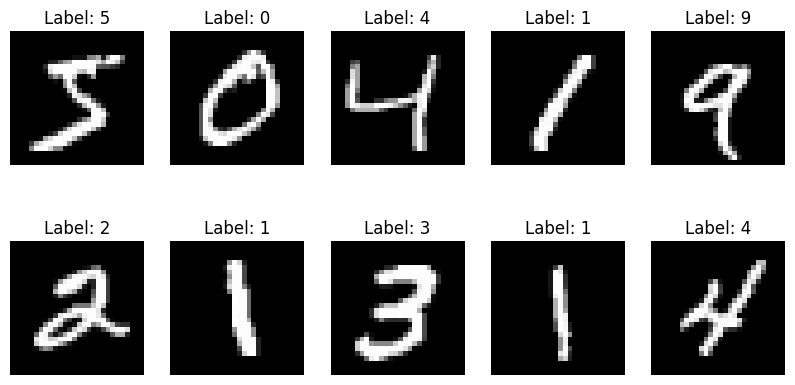

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape data to add channel dimension (28x28x1)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32')
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32')

# Normalize images to the range [0, 1]
train_images /= 255
test_images /= 255

# One-hot encode labels
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Plot some samples
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(train_labels[i])}")
    plt.axis('off')
plt.show()




In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for MNIST dataset
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model architecture
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128,
                    validation_data=(test_images, test_labels))

# Save the trained model
model.save('handwritten_character_model.h5')



Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.8023 - loss: 0.6184 - val_accuracy: 0.9837 - val_loss: 0.0554
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.9772 - loss: 0.0796 - val_accuracy: 0.9903 - val_loss: 0.0310
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9862 - loss: 0.0487 - val_accuracy: 0.9927 - val_loss: 0.0258
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9882 - loss: 0.0395 - val_accuracy: 0.9908 - val_loss: 0.0309
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 90ms/step - accuracy: 0.9890 - loss: 0.0349 - val_accuracy: 0.9885 - val_loss: 0.0384
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 69s 62ms/step - accuracy: 0.9911 - loss: 0.0303 - val_accuracy: 0.9927 - val_loss: 0.0218
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 65ms/step - accuracy: 0.9927 - loss: 0.0229 - val_accuracy: 0.9924 - val_loss: 0.0217
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.9939 - loss: 0.0214 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9890 - loss: 0.0362
Test accuracy: 0.9918000102043152


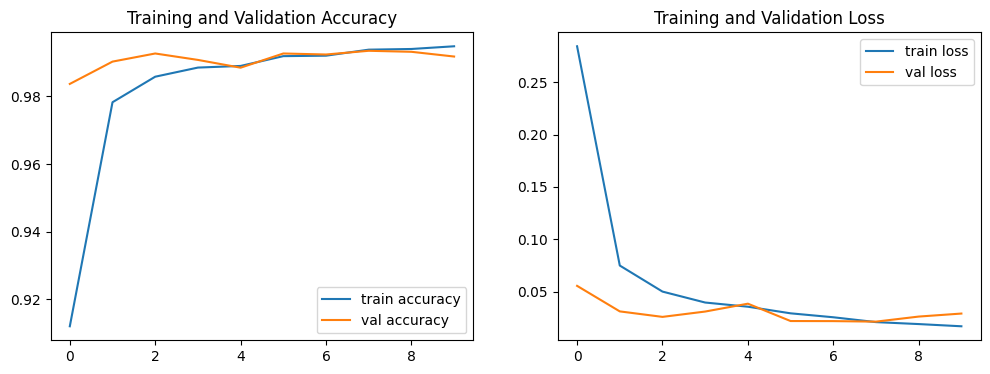

In [9]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Plot training & validation accuracy/loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [11]:
import cv2

# Load the model
model = tf.keras.models.load_model('handwritten_character_model.h5')

# Function to preprocess custom images
def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = img.reshape(1, 28, 28, 1).astype('float32') / 255
    return img

# Test the model with a custom image
img_path = 'test_img.jpg'
img = preprocess_image(img_path)
prediction = model.predict(img)
predicted_label = np.argmax(prediction)
print(f'Predicted Label: {predicted_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Predicted Label: 5
